In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet

#import nypd crime data
crime_df= pd.read_csv('extended_nypd_crime_data.csv')

In [17]:
# create a dataframe with only the columns we need: cmplnt_fr_dt, cmplnt_fr_tm, rpt_dt, ofns_desc, boro_nm, susp_age_group
crime2_df = crime_df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'ofns_desc', 'boro_nm']]

#drop rows with null values from boro_nm and do not include in dataframe
crime2_df = crime2_df.dropna(subset=['boro_nm'])


crime2_df.head()



,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,boro_nm
0,2010-10-27T00:00:00.000,19:30:00,PETIT LARCENY,BRONX
1,2021-05-24T00:00:00.000,03:00:00,PETIT LARCENY,BRONX
2,2010-02-10T00:00:00.000,12:00:00,PETIT LARCENY,STATEN ISLAND
3,2010-02-09T00:00:00.000,15:00:00,PETIT LARCENY,STATEN ISLAND
4,2010-07-29T00:00:00.000,08:00:00,PETIT LARCENY,STATEN ISLAND


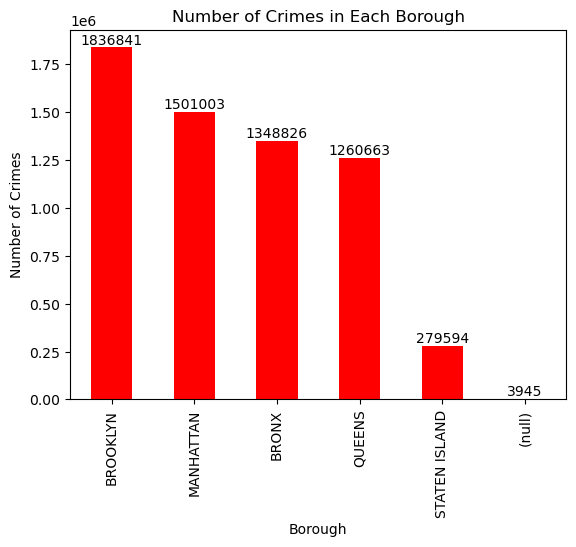

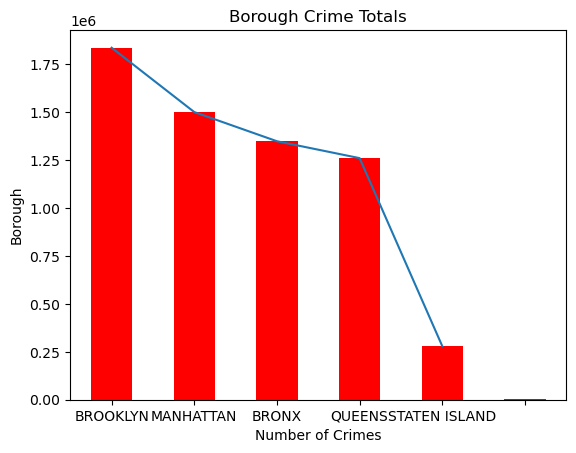

In [18]:
# create a chart that shows the number of crimes in each borough and remove the null values
ax = crime2_df['boro_nm'].dropna().value_counts().plot(kind='bar', color='red')
plt.title('Number of Crimes in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')

# loop over the bars and use the text() function to add the totals
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# convert the totals labels on the bars into 1,000s
ax = crime2_df['boro_nm'].dropna().value_counts().plot(kind='bar', color='red')

# switch the x and y axis and remove the (null) values
crime2_df['boro_nm'].dropna().value_counts().drop('(null)').plot(kind='line')
plt.title('Borough Crime Totals')
plt.xlabel('Number of Crimes')
plt.ylabel('Borough')
plt.show()

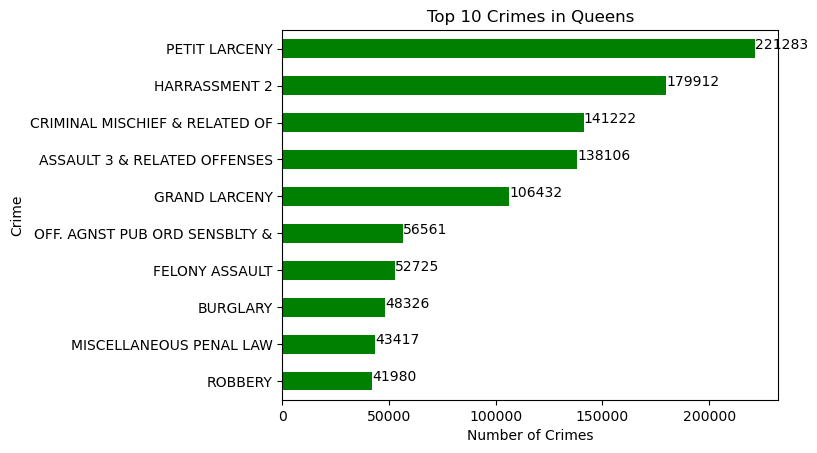

In [23]:
import matplotlib.pyplot as plt

# store the result of value_counts() in a variable
values = crime2_df[crime2_df['boro_nm'] == 'QUEENS']['ofns_desc'].value_counts().head(10).sort_values()

# plot the bar chart
values.plot(kind='barh', color='green')

# loop over the values and use the text() function to add the labels
for index, value in enumerate(values):
    plt.text(value, index, str(value))

# add a title and labels
plt.title('Top 10 Crimes in Queens')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime')


plt.show()


In [24]:
# group the data by borough and find the most common crime in each group
top_crimes = crime2_df.groupby('boro_nm')['ofns_desc'].value_counts().groupby(level=0).idxmax()

# convert the result to a DataFrame
top_crimes_df = top_crimes.to_frame()


# print the DataFrame
print(top_crimes_df)

                                        count
boro_nm                                      
(null)                ((null), PETIT LARCENY)
BRONX                  (BRONX, PETIT LARCENY)
BROOKLYN            (BROOKLYN, PETIT LARCENY)
MANHATTAN          (MANHATTAN, PETIT LARCENY)
QUEENS                (QUEENS, PETIT LARCENY)
STATEN ISLAND  (STATEN ISLAND, HARRASSMENT 2)


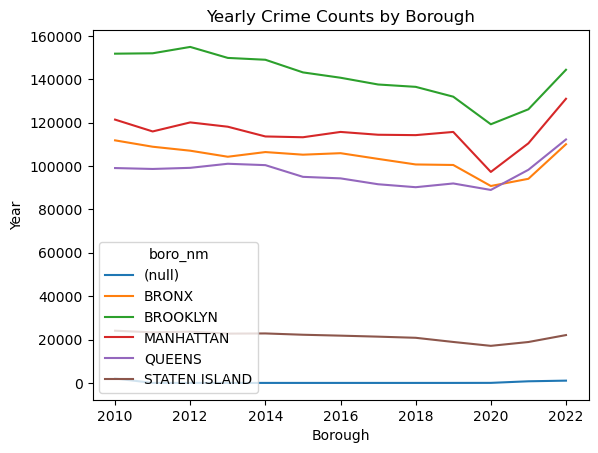

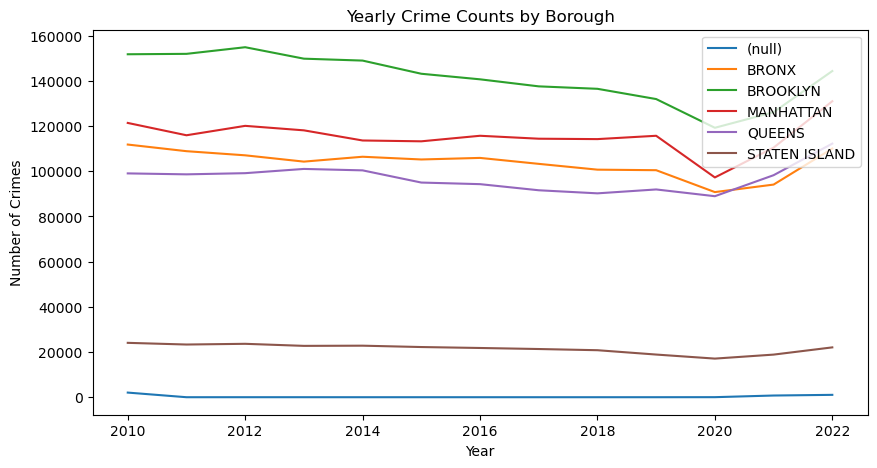

In [39]:
# remove null values
crime2_df = crime2_df.dropna(subset=['boro_nm', 'year'])

# group the data by borough and year and count the number of crimes
crime_counts = crime2_df.groupby(['boro_nm', 'year']).size().unstack()

# swap the rows and columns
crime_counts = crime_counts.transpose()

# plot the data
crime_counts.plot(kind='line')
plt.title('Yearly Crime Counts by Borough')
plt.xlabel('Borough')
plt.ylabel('Year')
plt.show()

# Increase the size of the plot and move the legend to the top right
crime_counts.plot(kind='line', figsize=(10, 5))
plt.title('Yearly Crime Counts by Borough')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper right')
plt.show()

#plot the data using plotly
fig = px.line(crime_counts, title='Yearly Crime Counts by Borough')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Crimes',
    legend_title='Borough'
)
fig.show()




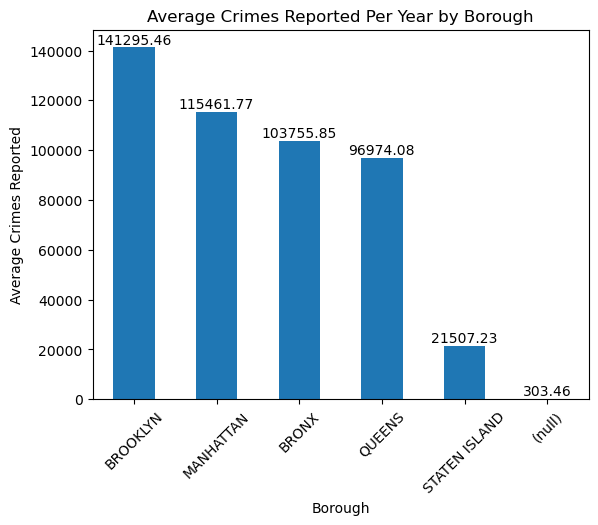

In [46]:
# group the data by borough and calculate the average number of crimes reported per year
average_crimes = crime2_df.groupby(['boro_nm', 'year']).size().groupby(level=0).mean()

# sort the average crimes in descending order
average_crimes = average_crimes.sort_values(ascending=False)

# plot the data
average_crimes.plot(kind='bar')
plt.title('Average Crimes Reported Per Year by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Crimes Reported')
plt.xticks(rotation=45)
for index, value in enumerate(average_crimes):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()




